<a href="https://colab.research.google.com/github/JulioFMDB/portfolio/blob/main/Primeiro_Projeto(STILL_WORKING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***My first project***
# Júlio Felipe Monteiro De Bem
[My linkedIn](https://www.linkedin.com/in/juliodebem/)

[My Github](https://github.com/JulioFMDB)

[My personal Instagram](https://www.instagram.com/juliodebem)

---


Olá. Sou Júlio De Bem, analista de sistemas e pós graduando em Ciencia de dados, Machine Learning e inteligencia artificial. Neste notebook estou desenvolvendo minhas habilidades em Análise e manipulação de dados com o que aprendo nas aulas do professor [Diego Bilhalva](https://http://www.diegobilhalva.com/). Comentarei as linhas em português e inglês.

# Este é meu primeiro projeto e tratarei do seguinte tema:
### Tarefa de ciência de dados
Você é um cientista de dados na Xcompany e pode encontrar no banco de dados sobre decisões de crédito no estado americano de Nova York, incluindo as características dos candidatos e propriedades.

Encontre conexões interessantes nos dados e explique como um modelo de aprendizado supervisionado de sua escolha pode ser usado como um produto de dados na Xcompany. Você então nos envia seus resultados em um notebook Jupyter.

A tarefa nos ajuda a avaliar suas habilidades como cientista de dados, então relaxe!


---


# -- English Version --
Hi there. I'm Júlio De Bem, system analyst and studing Data Science, Machine Learning e AI. This notebook, has been made to dvelop and increase my habilities e techniques to analyze and manipulate a database to complete the task below. Those techniques i learned from my teacher [Diego Bilhalva](https://http://www.diegobilhalva.com/). I'll coment the lines in Portuguese and English. 

# This is my first project and i'm dealing with the question below:
### Data science task
You are a data scientist at Xcompany and you can find the database above about credit decisions in the US state of New York including the characteristics of the applicants and properties.

Find interesting connections in the data and explain how a supervised learning model of your choice could be used as a data product at Xcompany. You then send us your results in a Jupyter notebook.

The task helps us assess your skills as a data scientist, so let off steam!

#**I have no information about this database, i can see it's a bank database that may or may not originate loan to it's customers**

In [129]:
# Esta é minha primeira análise de dados visando completar a tarefa acima. Usarei de todas técnicas possíveis para solucionar os problemas.
# Nos comentários vou registrando passo a passo o que fiz para encontrar soluções e achados para ajudar a empresa.
# This is my first data analisys project. I'll use all possible techniques i know to solve the problems above.
# On the comment lines i'll register step by step what i did to fix the problems and help the company that need me.

In [130]:
# importações de bibliotecas que pretendo usar: / importing libraries i may use:
import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount('/content/drive')



import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import statsmodels.api as sm
from sqlalchemy import create_engine, MetaData

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
# Aqui vou definir o endereço da tabela .csv, atribuindo a variavel path para facilitar a conexão com o banco
# Here i'll define a variable as path to make it easy to conect with the database.
path = '/content/drive/MyDrive/Colab Notebooks/data/data.csv'
path

'/content/drive/MyDrive/Colab Notebooks/data/data.csv'

In [132]:
df = pd.read_csv(path) # Aqui eu uso o pandas para ler o arquivo / Here i use pandas to read the file.

#The Database...

In [133]:
df.head()

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,hoepa_status_name,lien_status_name,loan_purpose_name,loan_type_name,msamd_name,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,Collateral,NaN,NaN,Not a HOEPA loan,Secured by a first lien,Refinancing,Conventional,NaN,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,NaN,NaN,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,FHA-insured,"Buffalo, Cheektowaga, Niagara Falls - NY",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,NaN,NaN,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,NaN,NaN,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,NaN,NaN,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,NaN,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0


In [134]:
df.info() # Aqui eu pego info da tabela de dados /  here i check the the info about the datatable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               175862 non-null  object 
 1   agency_name                     175862 non-null  object 
 2   applicant_ethnicity_name        175862 non-null  object 
 3   applicant_race_name_1           175862 non-null  object 
 4   applicant_sex_name              175862 non-null  object 
 5   applicant_income_000s           151344 non-null  float64
 6   co_applicant_ethnicity_name     175862 non-null  object 
 7   co_applicant_race_name_1        175862 non-null  object 
 8   co_applicant_sex_name           175862 non-null  object 
 9   county_name                     175377 non-null  object 
 10  denial_reason_name_1            23067 non-null   object 
 11  denial_reason_name_2            4650 non-null    object 
 12  denial_reason_na

In [135]:
df.shape # Aqui eu checo o tamanho da minha tabela, linhas x colunas / Here i check the shape (lines x columns)

(175862, 28)

In [136]:
df.columns

Index(['action_taken_name', 'agency_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_purpose_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population'],
      dtype='object')

A empresa me pede para achar conexões interessantes no banco de dados. Então pensei em correlacionar os dados e usar um gráfico para checar as conexões entre os dados.


---


The company ask me to find intresting conections on the database. So i tought i could correlate the data, and than plot a graph to see the connections between the data.

In [137]:
df.corr() # depois disso decidi parar o corr pois ainda nao tinha muito conhecimento / after this i changed my mind to something new

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
applicant_income_000s,1.000000,0.062743,0.605178,-0.097038,-0.001842,-0.019914,0.049646
hud_median_family_income,0.062743,1.000000,0.024303,0.124362,0.169210,0.019638,0.117920
loan_amount_000s,0.605178,0.024303,1.000000,-0.114363,-0.059231,0.059363,0.031975
number_of_1_to_4_family_units,-0.097038,0.124362,-0.114363,1.000000,0.698996,-0.391761,0.389197
number_of_owner_occupied_units,-0.001842,0.169210,-0.059231,0.698996,1.000000,-0.493534,0.693811
minority_population,-0.019914,0.019638,0.059363,-0.391761,-0.493534,1.000000,-0.075733
population,0.049646,0.117920,0.031975,0.389197,0.693811,-0.075733,1.000000


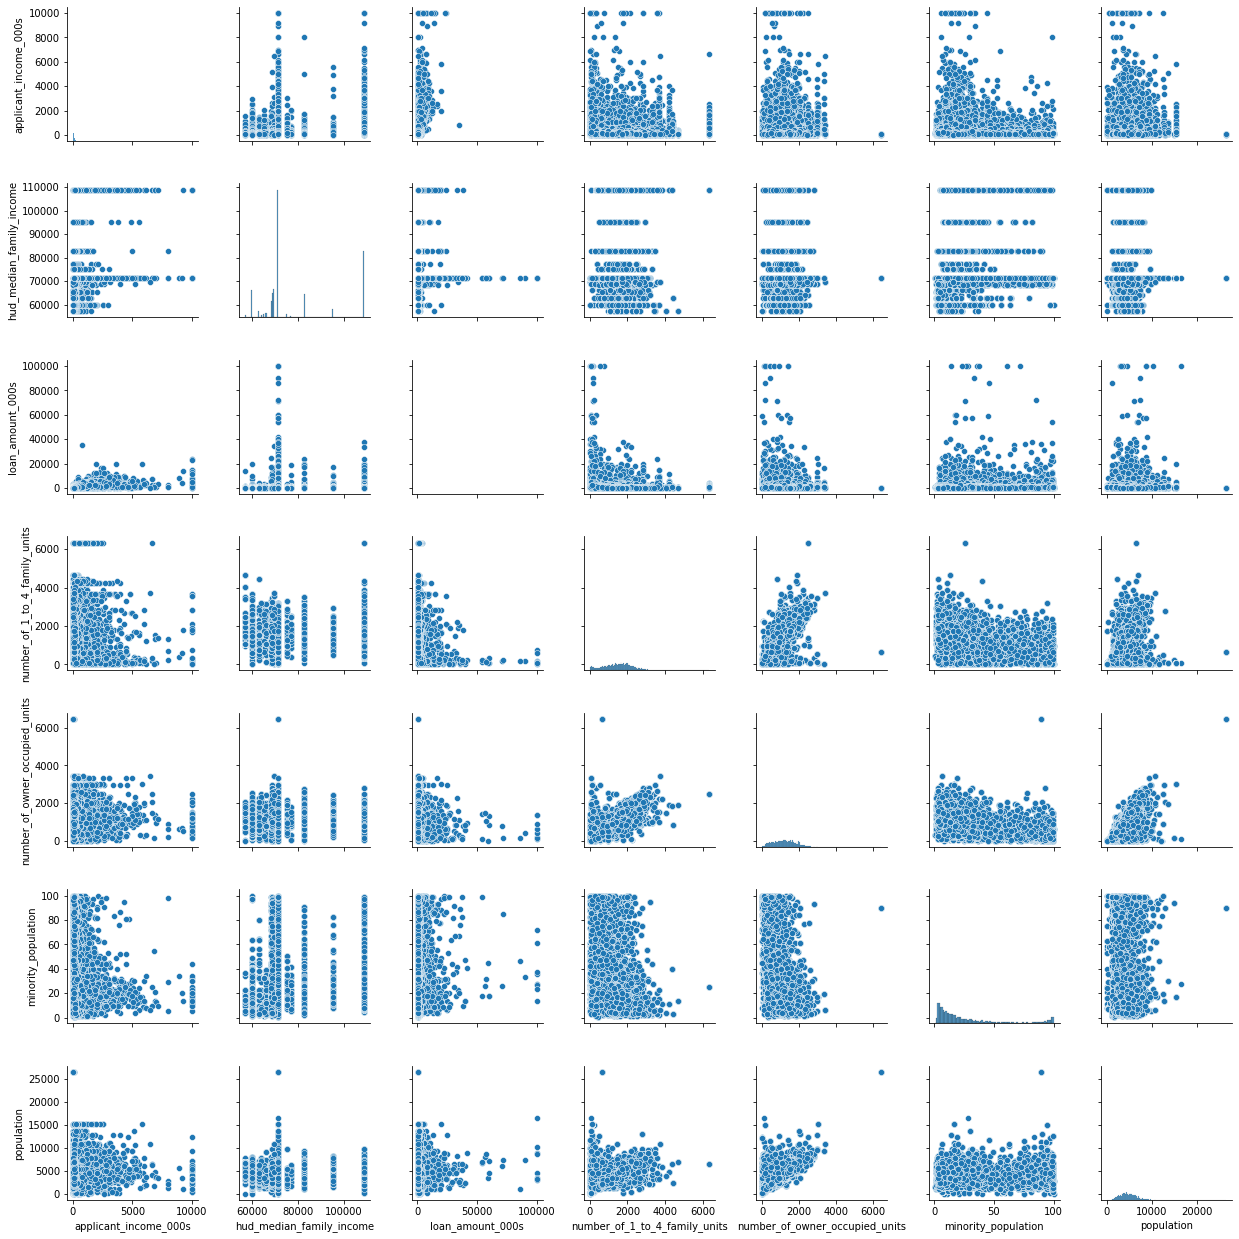

In [138]:
df2 = df[['applicant_income_000s','hud_median_family_income','loan_amount_000s','number_of_1_to_4_family_units','number_of_owner_occupied_units','minority_population', 'population']]

sns.pairplot(df2, kind="scatter")
plt.show() # but first i ploted it just for visualization...

# ETL - Extration, Transfor and LOAD

Nos proximos ```códigos``` irei realizar a parte mais demorada de um cientista de dados, **A limpeza de uma base de dados.** 

Irei fazer o seguinte:
- Limpeza / Transformação de ```NULOS```
- Checagem de outliers
- Trabalho de análises estatísticas
- Trabalho de Business Inteligence

**Vamos começar...**


---
During the next ```codes``` i'll perform the hardest work for a data scientist...the **Database cleaning**.

Here's what i'm going to do:
- CLeaning / Transforming ```Nulls/Nan's```
- Outliers checking
- Statistical analysis
- BI analysis


In [139]:
df.isnull().sum() # Checking Nulls and 

action_taken_name                      0
agency_name                            0
applicant_ethnicity_name               0
applicant_race_name_1                  0
applicant_sex_name                     0
applicant_income_000s              24518
co_applicant_ethnicity_name            0
co_applicant_race_name_1               0
co_applicant_sex_name                  0
county_name                          485
denial_reason_name_1              152795
denial_reason_name_2              171212
denial_reason_name_3              174942
hoepa_status_name                      0
lien_status_name                       0
loan_purpose_name                      0
loan_type_name                         0
msamd_name                         14642
owner_occupancy_name                   0
preapproval_name                       0
property_type_name                     0
purchaser_type_name                    0
hud_median_family_income             684
loan_amount_000s                       0
number_of_1_to_4

In [140]:
dfnulos = df[['applicant_income_000s'
            ,'county_name'
            ,'denial_reason_name_1'
            ,'denial_reason_name_2'
            ,'denial_reason_name_3'
            ,'msamd_name'
            ,'hud_median_family_income'
            ,'number_of_1_to_4_family_units'
            ,'number_of_owner_occupied_units'
            ,'minority_population',
            'population'
            ]]

In [141]:
df_nulos = pd.DataFrame(dfnulos.isnull())# here we sum all the NaN cells and show in a DF...

In [142]:
df_nulos.head()

,applicant_income_000s,county_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,msamd_name,hud_median_family_income,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,False,False,False,True,True,True,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False
3,False,False,True,True,True,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,False


# Considerations:

**- Since i have no information about this database, i started to use my feeling to clean it. To do this, i had to think, what kind of null information can i drop?**

- My first tought is, if the loan is not originated, there will be a  reason. If it is ```FALSE``` in the ```denial_reason_name_1``` it may be ```TRUE``` in the other reasons. So i can split this database in people that has or not it's loan originated. Than i can use statiscs to clean the outliers of both databases.
- Than i checked the column ```action_taken_name ```, wich give information that if the customer is suceed to get the loan, if the loan is denied, if the costumer withdraw the application to its loan. But it also give me information if the loan is purchased by the institution, approved but not accepted.

# Loan Accepted

- My first decision is to split this database into people that had its loan originated, and ill use few, but very important features i consider to take the loan. Than i'll use Machine Learnign to generate a prediction

In [143]:
df['action_taken_name'].unique()

array(['Application denied by financial institution',
       'Application withdrawn by applicant', 'Loan originated',
       'Loan purchased by the institution',
       'Application approved but not accepted',
       'File closed for incompleteness',
       'Preapproval request denied by financial institution'],
      dtype=object)

In [144]:
df_loan_accepted = pd.DataFrame(df[['action_taken_name','applicant_race_name_1', 'applicant_sex_name', 'loan_purpose_name', 'hud_median_family_income','number_of_1_to_4_family_units']])

In [145]:
df_loan_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   action_taken_name              175862 non-null  object 
 1   applicant_race_name_1          175862 non-null  object 
 2   applicant_sex_name             175862 non-null  object 
 3   loan_purpose_name              175862 non-null  object 
 4   hud_median_family_income       175178 non-null  float64
 5   number_of_1_to_4_family_units  174951 non-null  float64
dtypes: float64(2), object(4)
memory usage: 8.1+ MB


In [146]:
df_loan_accepted = df_loan_accepted.dropna(how='any') # Here i drop all NaN values

In [147]:
df_loan_accepted.describe() # A describe to check possible outliers to turn it into a clean DB to machine learning

,hud_median_family_income,number_of_1_to_4_family_units
count,174951.000000,174951.000000
mean,78167.435453,1514.470783
std,16210.940017,792.348709
min,57200.000000,6.000000
25%,69000.000000,967.000000
50%,71300.000000,1525.000000
75%,82700.000000,2011.000000
max,109000.000000,6345.000000


In [148]:
df_loan_accepted.info() #To check the dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 175861
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   action_taken_name              174951 non-null  object 
 1   applicant_race_name_1          174951 non-null  object 
 2   applicant_sex_name             174951 non-null  object 
 3   loan_purpose_name              174951 non-null  object 
 4   hud_median_family_income       174951 non-null  float64
 5   number_of_1_to_4_family_units  174951 non-null  float64
dtypes: float64(2), object(4)
memory usage: 9.3+ MB


In [149]:
df_loan_accepted['action_taken_name'].unique() # mapping action taken

array(['Application denied by financial institution',
       'Application withdrawn by applicant', 'Loan originated',
       'Loan purchased by the institution',
       'Application approved but not accepted',
       'File closed for incompleteness',
       'Preapproval request denied by financial institution'],
      dtype=object)

In [150]:
df_loan_accepted['action_taken_name'] = df_loan_accepted['action_taken_name'].map({'Application denied by financial institution':0
                                                                                  ,'Application withdrawn by applicant':1
                                                                                  ,'Loan originated':2
                                                                                  ,'Loan purchased by the institution':3
                                                                                  ,'Application approved but not accepted':4
                                                                                  ,'File closed for incompleteness':5
                                                                                  ,'Preapproval request denied by financial institution':6})

In [151]:
df_loan_accepted['applicant_race_name_1'].unique() #Checking the objects and mapping it into INT type

array(['White', 'Asian', 'Not applicable',
       'Information not provided by applicant in mail, Internet, or telephone application',
       'Black or African American', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [152]:
df_loan_accepted['applicant_race_name_1'] = df_loan_accepted['applicant_race_name_1'].map({'White':0
                                                                                           ,'Asian':1
                                                                                           ,'Not applicable':2
                                                                                           ,'Information not provided by applicant in mail, Internet, or telephone application':3
                                                                                           ,'Black or African American':4
                                                                                           ,'American Indian or Alaska Native':5
                                                                                           ,'Native Hawaiian or Other Pacific Islander':6 })

In [153]:
df_loan_accepted['applicant_sex_name'].unique() # Mapping applicant sex name

array(['Female', 'Male', 'Not applicable',
       'Information not provided by applicant in mail, Internet, or telephone application'],
      dtype=object)

In [154]:
df_loan_accepted['applicant_sex_name'] = df_loan_accepted['applicant_sex_name'].map({'Female':0
                                                                                    ,'Male':1
                                                                                    ,'Not applicable':2
                                                                                    ,'Information not provided by applicant in mail, Internet, or telephone application':3
                                                                                    ,'Black or African American':4
                                                                                    ,'American Indian or Alaska Native':5
                                                                                    ,'Native Hawaiian or Other Pacific Islander':6 })

In [155]:
df_loan_accepted['loan_purpose_name'].unique() # Mapping the purpose name

array(['Refinancing', 'Home purchase', 'Home improvement'], dtype=object)

In [156]:
df_loan_accepted['loan_purpose_name'] = df_loan_accepted['loan_purpose_name'].map({'Refinancing':0
                                                                                  ,'Home purchase':1
                                                                                  ,'Home improvement':2 })

In [157]:
from sklearn.model_selection import train_test_split

feature_names = ['applicant_race_name_1', 'applicant_sex_name', 'loan_purpose_name', 'hud_median_family_income','number_of_1_to_4_family_units']
df_loan_accepted['action_taken_name']# = titanic['sex'].map({'male': 0, 'female': 1})


X = df_loan_accepted[feature_names].to_numpy()
y = df_loan_accepted['action_taken_name'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=123)

In [158]:
print('shape X_train: {0}'.format(X_train.shape))
print('shape X_train: {0}'.format(y_train.shape))
print('shape X_train: {0}'.format(X_test.shape))
print('shape X_train: {0}'.format(y_test.shape))

shape X_train: (131213, 5)
shape X_train: (131213,)
shape X_train: (43738, 5)
shape X_train: (43738,)


# Normalizing and Standarizing

In [159]:
dataset = pd.DataFrame(df_loan_accepted[['action_taken_name','applicant_race_name_1', 'applicant_sex_name', 'loan_purpose_name', 'hud_median_family_income','number_of_1_to_4_family_units']])

In [160]:
colunas = dataset.columns
colunas

Index(['action_taken_name', 'applicant_race_name_1', 'applicant_sex_name',
       'loan_purpose_name', 'hud_median_family_income',
       'number_of_1_to_4_family_units'],
      dtype='object')

In [161]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

In [162]:
df_loan_accepted = pd.DataFrame(scaler_standard.fit_transform(dataset))
df_loan_accepted.head()

,0,1,2,3,4,5
0,-1.575291,-0.658031,-1.214223,-1.100223,-1.120693,1.376329
1,-0.731651,-0.658031,0.045694,0.449439,-0.565511,0.679664
2,0.111990,-0.658031,0.045694,0.449439,-0.423631,-1.284124
3,0.111990,0.067968,-1.214223,0.449439,-0.423631,-1.594594
4,0.111990,-0.658031,0.045694,0.449439,-1.120693,-0.000594


In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler_minMax = MinMaxScaler()

In [182]:
df_loan_accepted = pd.DataFrame(scaler_minMax.fit_transform(df_loan_accepted), columns = colunas)
df_loan_accepted.head()

,action_taken_name,applicant_race_name_1,applicant_sex_name,loan_purpose_name,hud_median_family_income,number_of_1_to_4_family_units
0,0.000000,0.000000,0.000000,0.0,0.054054,0.410002
1,0.166667,0.000000,0.333333,0.5,0.227799,0.322922
2,0.333333,0.000000,0.333333,0.5,0.272201,0.077457
3,0.333333,0.166667,0.000000,0.5,0.272201,0.038650
4,0.333333,0.000000,0.333333,0.5,0.054054,0.237892


In [183]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,
                             max_depth=4,
                             random_state=123,
                             n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, n_jobs=-1,
                       random_state=123)

In [184]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.61

 ---------------------------

Acurácia de Teste: 0.61


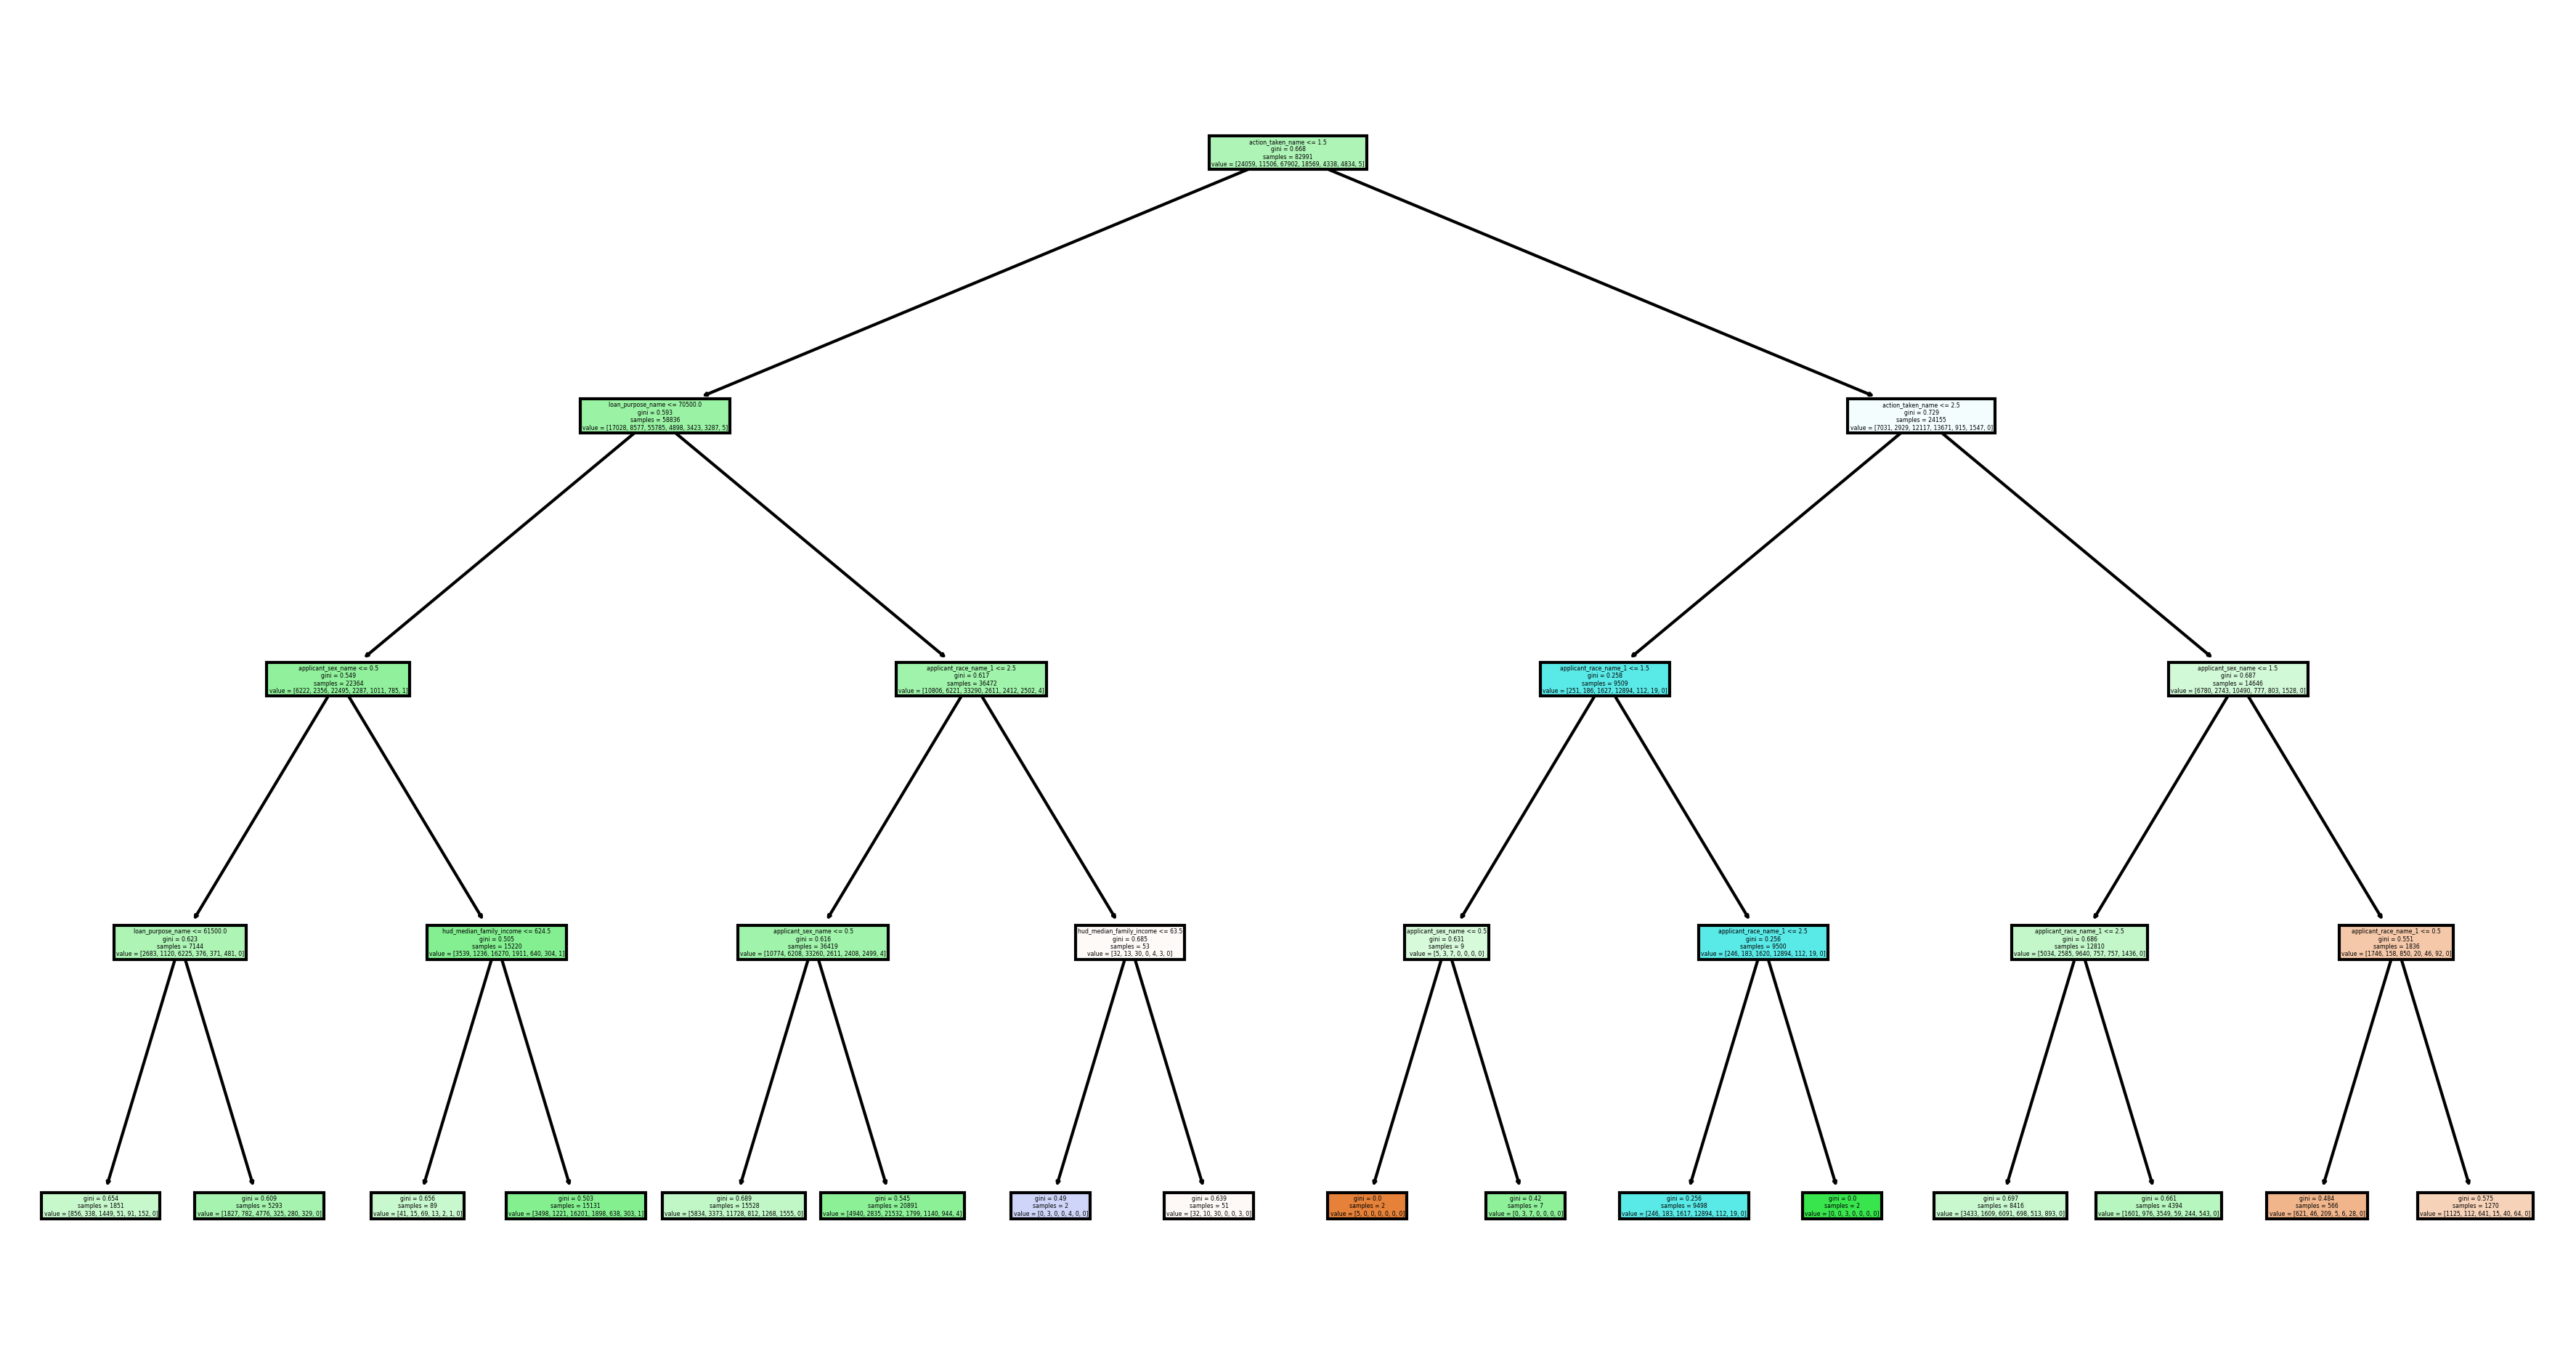

In [186]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(
    clf.estimators_[299]
    , filled=True
    , feature_names={0:'action_taken_name'
                     ,1:'applicant_race_name_1'
                     ,2:'applicant_sex_name'
                     ,3:'loan_purpose_name'
                     ,4:'hud_median_family_income'
                     ,5:'number_of_1_to_4_family_units'})
plt.show()